<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/Clustering%20and%20Unsupervised%20Learning/K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means Clustering

## 1. Understand K-means

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

We randomly generate some groups of data in 2-d space

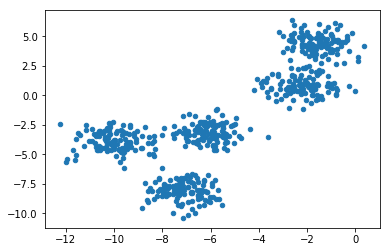

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=600, centers=5, cluster_std=0.8, random_state=1)
plt.scatter(X[:, 0], X[:, 1], s=20);

Then we run the K-means algorithm, find out the centroid of each group of data, and make predictions.

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [4]:
kmeans.cluster_centers_

array([[-9.98787166, -3.88556349],
       [-2.17812827,  0.7903456 ],
       [-7.12477649, -8.09803975],
       [-6.11398201, -3.11924685],
       [-1.55383662,  4.44779912]])

Finally we plot the data with predicted values in differnt colors, and show centroid in red circle.

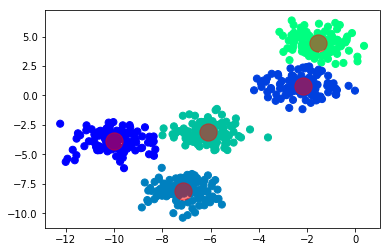

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.5);

## 2. K-means for image compression

https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

In [0]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
#ax = plt.axes(xticks=[], yticks=[])
#ax.imshow(china);

In [35]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape


(273280, 3)

In [0]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
reduced_colors = kmeans.cluster_centers_[kmeans.predict(data)]


In [0]:
china_recolored = reduced_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(20, 8),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);
plt.show()

In [0]:
r = []
g = []
b = []

for line in china:
  for pixel in line:
    temp_r, temp_g, temp_b = pixel
    r.append(temp_r)
    g.append(temp_g)
    b.append(temp_b)

In [0]:
r_d = []
g_d = []
b_d = []

for line in china_recolored:
  for pixel in line:
    temp_r, temp_g, temp_b = pixel
    r_d.append(temp_r)
    g_d.append(temp_g)
    b_d.append(temp_b)

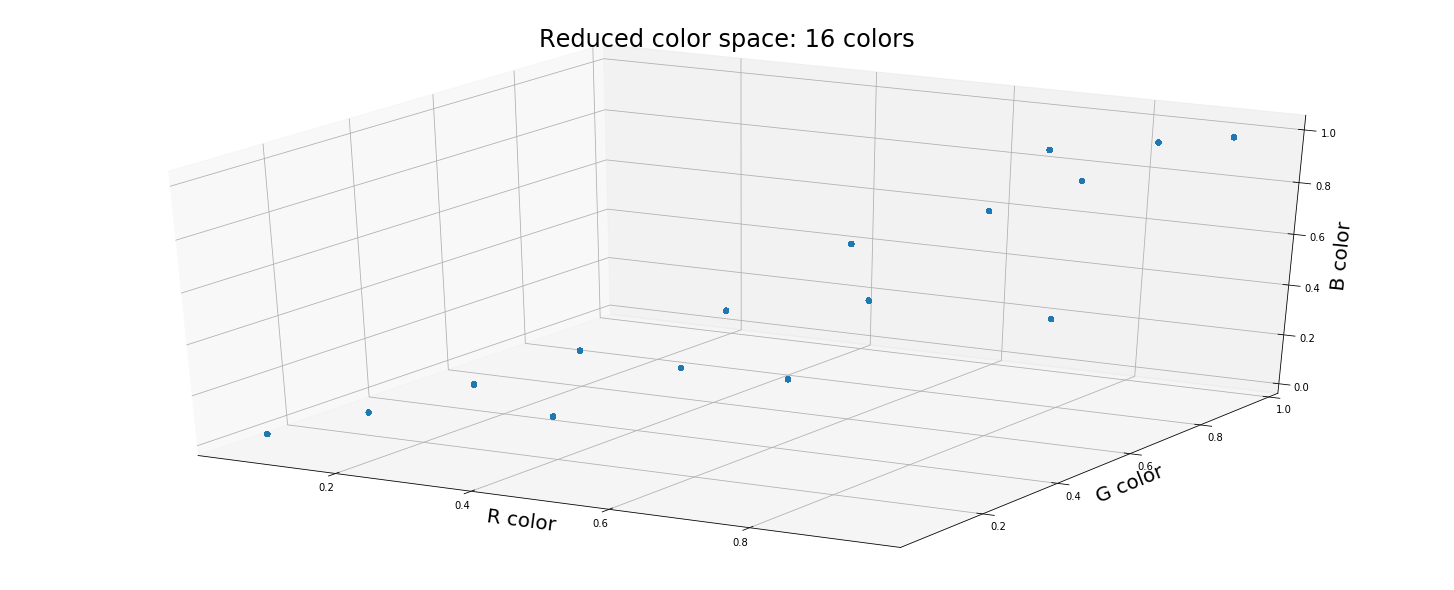

In [42]:
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(1, 2, figsize=(20, 8),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)

ax[0] = Axes3D(fig)
ax[0].scatter(r, g, b)
ax[0].set_xlabel('R color', fontsize=20)
ax[0].set_ylabel('G color', fontsize=20)
ax[0].set_zlabel('B color', fontsize=20)
ax[0].set_title('Original color space: 16,777,216 colors', fontsize=24)


ax[1] = Axes3D(fig)
ax[1].scatter(r_d, g_d, b_d)
ax[1].set_xlabel('R color', fontsize=20)
ax[1].set_ylabel('G color', fontsize=20)
ax[1].set_zlabel('B color', fontsize=20)
ax[1].set_title('Reduced color space: 16 colors', fontsize=24)


plt.show()